In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
# Dataset directory
train_dir = "C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split\\train"
val_dir = "C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split\\val"
test_dir = "C:\\Users\VICTUS\\AI October\\Final Project\\Dataset_Split\\test"

# Model parameters
num_classes = 10  # Specify the number of classes in your dataset
input_shape = (224, 224, 3)  # Input shape expected by MobileNetV3


# Training parameters
batch_size = 32
epochs = 5
learning_rate = 0.001

In [15]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical'
)


Found 2906 images belonging to 8 classes.
Found 620 images belonging to 8 classes.


In [17]:
# Load pre-trained MobileNetV3-Large model
base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification (adjust units based on your number of classes)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
import tensorflow as tf

# Print GPU devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPU devices:", physical_devices)


Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/50
243/243 [==============================] - ETA: 0s - loss: 0.8033 - accuracy: 0.6142
Epoch 1: val_accuracy improved from -inf to 0.10645, saving model to best_model_mobilenetv3.h5
243/243 [==============================] - 39s 137ms/step - loss: 0.8033 - accuracy: 0.6142 - val_loss: 2.9019 - val_accuracy: 0.1065
Epoch 2/50
243/243 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.6432
Epoch 2: val_accuracy did not improve from 0.10645
243/243 [==============================] - 31s 128ms/step - loss: 0.6905 - accuracy: 0.6432 - val_loss: 3.2567 - val_accuracy: 0.0274
Epoch 3/50
243/243 [==============================] - ETA: 0s - loss: 0.6180 - accuracy: 0.6703
Epoch 3: val_accuracy improved from 0.10645 to 0.10806, saving model to best_model_mobilenetv3.h5
243/243 [==============================] - 32s 130ms/step - loss: 0.6180 - accuracy: 0.6703 - val_loss: 2.4293 - val_accuracy: 0.1081
Epoch 4/50
243/243 [==============================] - ETA: 0s - lo

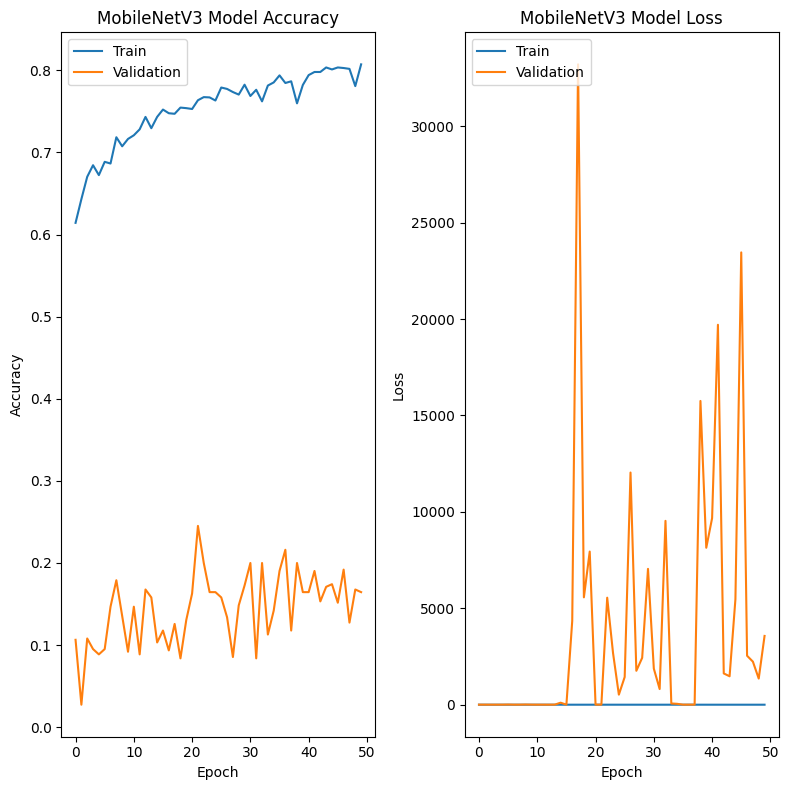

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
checkpoint = ModelCheckpoint('best_model_mobilenetv3.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Replace `epochs` with an integer, e.g., 30
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard]
)
# Plot training & validation accuracy values
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 2906 images belonging to 8 classes.
91/91 [==============================] - 15s 140ms/step


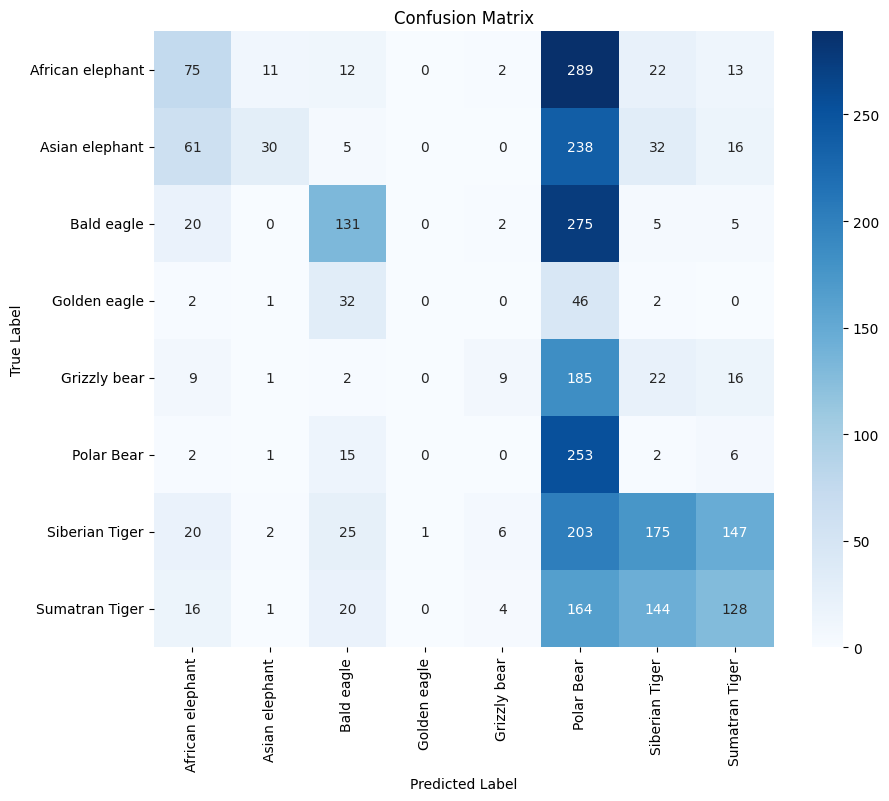

                  precision    recall  f1-score   support

African elephant       0.37      0.18      0.24       424
  Asian elephant       0.64      0.08      0.14       382
      Bald eagle       0.54      0.30      0.39       438
    Golden eagle       0.00      0.00      0.00        83
    Grizzly bear       0.39      0.04      0.07       244
      Polar Bear       0.15      0.91      0.26       279
  Siberian Tiger       0.43      0.30      0.36       579
  Sumatran Tiger       0.39      0.27      0.32       477

        accuracy                           0.28      2906
       macro avg       0.36      0.26      0.22      2906
    weighted avg       0.42      0.28      0.27      2906



In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming dataset directories are defined
test_dir = "C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split\\train"

# Load the best model
model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(320, 320),
    batch_size=32,  # Adjust if needed
    class_mode='categorical',
    shuffle=False
)

# Get true labels and class indices
true_classes = test_generator.classes
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 631 images belonging to 8 classes.
20/20 [==============================] - 3s 116ms/step


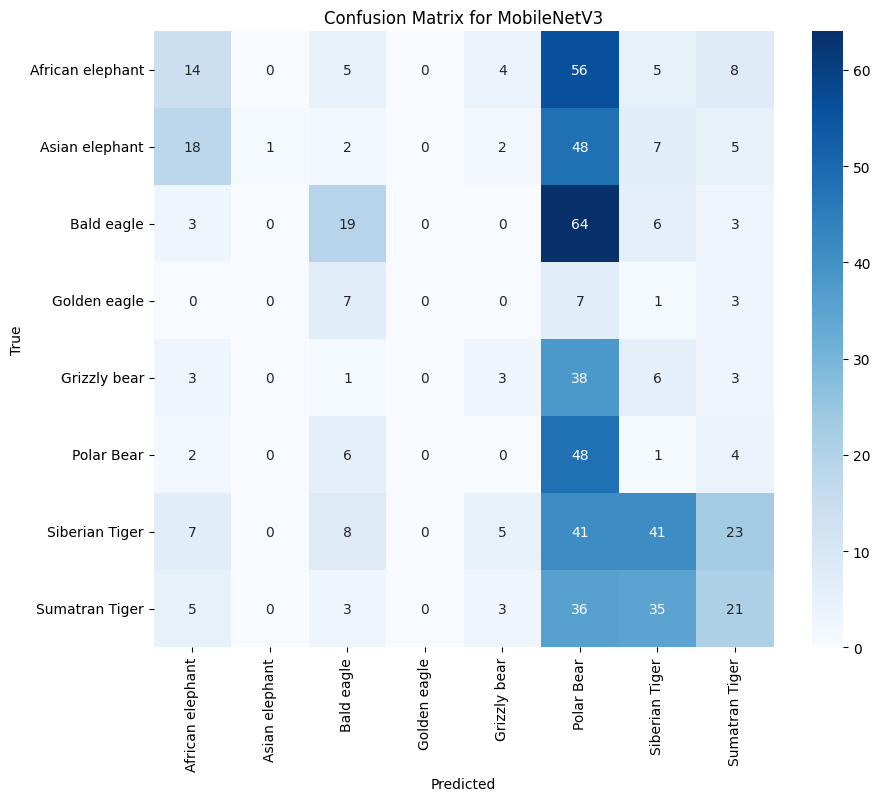

Classification Report for MobileNetV3
                  precision    recall  f1-score   support

African elephant       0.27      0.15      0.19        92
  Asian elephant       1.00      0.01      0.02        83
      Bald eagle       0.37      0.20      0.26        95
    Golden eagle       0.00      0.00      0.00        18
    Grizzly bear       0.18      0.06      0.08        54
      Polar Bear       0.14      0.79      0.24        61
  Siberian Tiger       0.40      0.33      0.36       125
  Sumatran Tiger       0.30      0.20      0.24       103

        accuracy                           0.23       631
       macro avg       0.33      0.22      0.18       631
    weighted avg       0.38      0.23      0.21       631



In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 320, 320
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=False
)

# Load the trained model (ensure this path is correct)
mobilenetv3_model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Predict using the loaded model
y_pred_mobilenetv3 = mobilenetv3_model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3 = np.argmax(y_pred_mobilenetv3, axis=1)

# Plotting confusion matrices
classes = list(test_generator.class_indices.keys())  # Use the class names from the dataset

plot_confusion_matrix(y_true, y_pred_labels_mobilenetv3, classes, 'MobileNetV3')

# Print the classification report
print('Classification Report for MobileNetV3')
print(classification_report(y_true, y_pred_labels_mobilenetv3, target_names=classes, zero_division=0))




Found 2906 images belonging to 8 classes.
Found 620 images belonging to 8 classes.
Found 631 images belonging to 8 classes.
4334752/4334752 [==============================] - 0s 0us/step
Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 0.8098 - accuracy: 0.6122
Epoch 1: val_accuracy improved from -inf to 0.62903, saving model to best_mobilenetv3_small_model.h5
91/91 [==============================] - 17s 152ms/step - loss: 0.8098 - accuracy: 0.6122 - val_loss: 0.6617 - val_accuracy: 0.6290
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.5731 - accuracy: 0.6810
Epoch 2: val_accuracy did not improve from 0.62903
91/91 [==============================] - 11s 125ms/step - loss: 0.5731 - accuracy: 0.6810 - val_loss: 0.6658 - val_accuracy: 0.5887
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.7078
Epoch 3: val_accuracy did not improve from 0.62903
91/91 [==============================] - 12s 127ms/step - loss: 

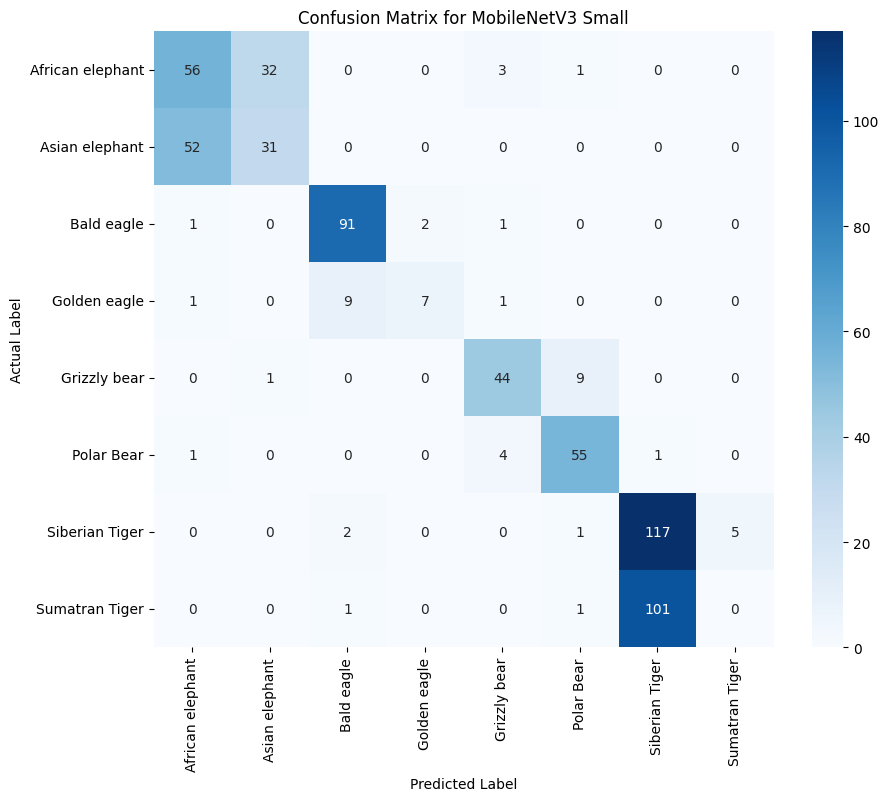

Classification Report for MobileNetV3 Small
                  precision    recall  f1-score   support

African elephant       0.50      0.61      0.55        92
  Asian elephant       0.48      0.37      0.42        83
      Bald eagle       0.88      0.96      0.92        95
    Golden eagle       0.78      0.39      0.52        18
    Grizzly bear       0.83      0.81      0.82        54
      Polar Bear       0.82      0.90      0.86        61
  Siberian Tiger       0.53      0.94      0.68       125
  Sumatran Tiger       0.00      0.00      0.00       103

        accuracy                           0.64       631
       macro avg       0.60      0.62      0.60       631
    weighted avg       0.55      0.64      0.58       631



In [33]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large, MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = 'C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data generators with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3_small', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys(),zero_division=0))


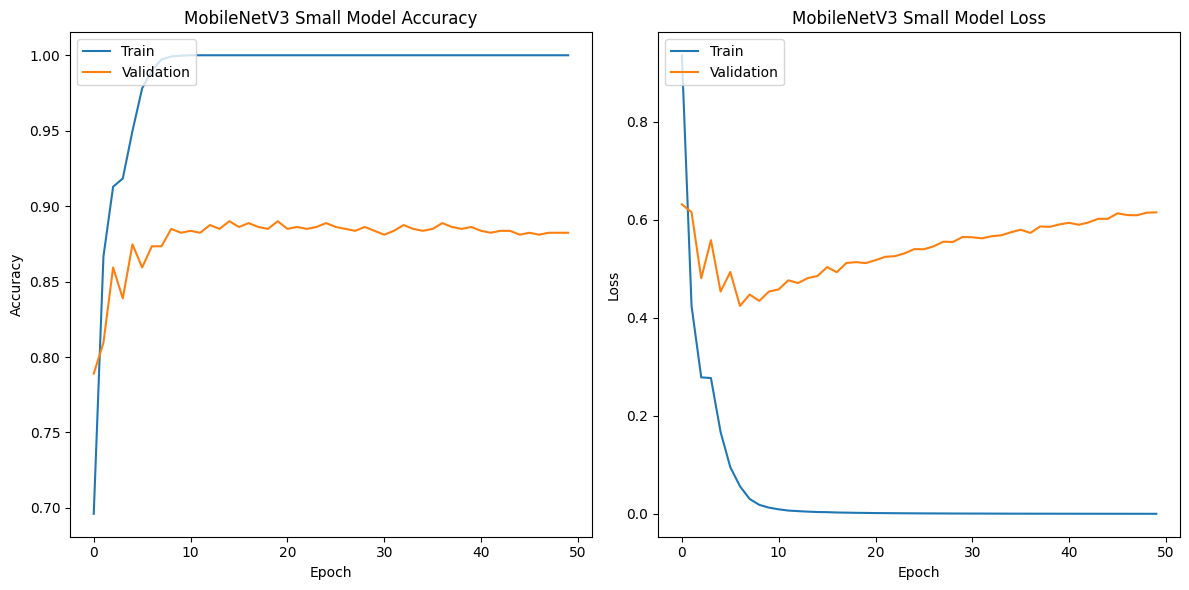

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 2906 images belonging to 8 classes.
Found 620 images belonging to 8 classes.
Found 631 images belonging to 8 classes.
Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 1.0440 - accuracy: 0.5705
Epoch 1: val_accuracy improved from -inf to 0.63065, saving model to best_mobilenetv3_small_model.h5
91/91 [==============================] - 35s 358ms/step - loss: 1.0440 - accuracy: 0.5705 - val_loss: 0.6540 - val_accuracy: 0.6306
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.7474 - accuracy: 0.6280
Epoch 2: val_accuracy did not improve from 0.63065
91/91 [==============================] - 29s 319ms/step - loss: 0.7474 - accuracy: 0.6280 - val_loss: 0.6618 - val_accuracy: 0.6177
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.7148 - accuracy: 0.6315
Epoch 3: val_accuracy did not improve from 0.63065
91/91 [==============================] - 29s 321ms/step - loss: 0.7148 - accuracy: 0.6315 - val_loss: 0.6240 - val_accuracy: 0.

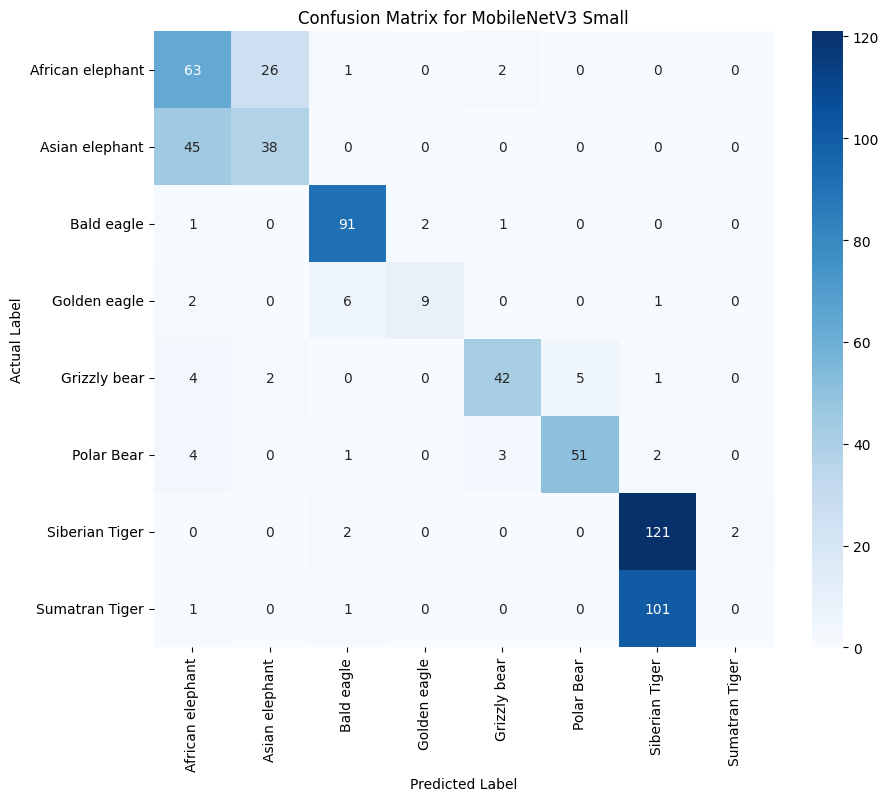

Classification Report for MobileNetV3 Small
                  precision    recall  f1-score   support

African elephant       0.53      0.68      0.59        92
  Asian elephant       0.58      0.46      0.51        83
      Bald eagle       0.89      0.96      0.92        95
    Golden eagle       0.82      0.50      0.62        18
    Grizzly bear       0.88      0.78      0.82        54
      Polar Bear       0.91      0.84      0.87        61
  Siberian Tiger       0.54      0.97      0.69       125
  Sumatran Tiger       0.00      0.00      0.00       103

        accuracy                           0.66       631
       macro avg       0.64      0.65      0.63       631
    weighted avg       0.58      0.66      0.60       631



In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = 'C:\\Users\\VICTUS\\AI October\\Final Project\\Dataset_Split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3_small', histogram_freq=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard, early_stopping]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))


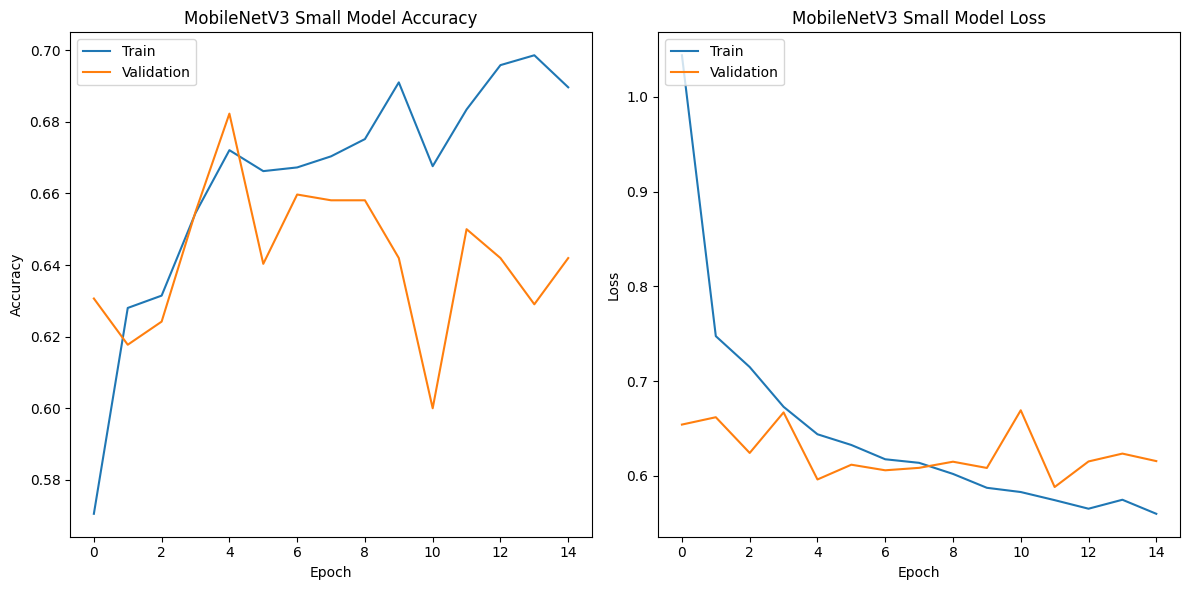

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
